In [87]:
# Import pandas and seaborn
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter, MaxNLocator
import seaborn as sns

# Loading and Cleaning the DataFrame

Create a DataFrame from the CSV file. Create a copy of the DataFrame to not dismantle original DataFrame integrity. And maybe call back at a later time. When we import the CSV file, we parse out the date of the second column, for easier pandas interpretation. 

Display all of the columns for easier inspection. 

Columns in DataFrame were then reshaped on strings. Replacing spaces and hyphens with underscores for easier querying later on. All columns were also lower-cased, again for easier querying later on.

In [88]:
# Load CSV file into Dataframe object
# Parse data on file load in for easier analysis later on
df = pd.read_csv('/thedevastator/unlock-profits-with-e-commerce-sales-data/versions/2/Amazon Sale Report.csv', parse_dates=[2])
# Create a copy of DataFrame
df1 = df.copy()
# Display all columns
pd.set_option('display.max_columns', 24)

# Clean up data columns to write queries later on 
# Replace spaces and hyphens with underscores
df1.columns = df.columns.str.replace(' ', '_').str.replace('-', '_')
# Lower case all of the column names with a lambda function
df1.columns = [x.lower() for x in df1.columns]

/var/folders/qk/s207mp6s0bb_2v_0kk7qy5lm0000gn/T/ipykernel_84642/3261715721.py:3: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/kevinmeralla/Desktop/Developer/Python/E-Commerce_Sales_Dataset/thedevastator/unlock-profits-with-e-commerce-sales-data/versions/2/Amazon Sale Report.csv', parse_dates=[2])
/var/folders/qk/s207mp6s0bb_2v_0kk7qy5lm0000gn/T/ipykernel_84642/3261715721.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/Users/kevinmeralla/Desktop/Developer/Python/E-Commerce_Sales_Dataset/thedevastator/unlock-profits-with-e-commerce-sales-data/versions/2/Amazon Sale Report.csv', parse_dates=[2])


Rows: 128,975

Columns: 24

In [89]:
df1.shape

(128975, 24)

In [90]:
# Let's inspect the first few rows of the dataframe
df1.head()

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category,size,asin,courier_status,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by,unnamed:_22
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


Begin by dropping duplicate values and inspecting columns for null values. Sum the null values to see how many null values we have.

In [91]:
# Drop duplicate values
df1.drop_duplicates()
# Check for null values
df1.isnull().sum()

index                     0
order_id                  0
date                      0
status                    0
fulfilment                0
sales_channel_            0
ship_service_level        0
style                     0
sku                       0
category                  0
size                      0
asin                      0
courier_status         6872
qty                       0
currency               7795
amount                 7795
ship_city                33
ship_state               33
ship_postal_code         33
ship_country             33
promotion_ids         49153
b2b                       0
fulfilled_by          89698
unnamed:_22           49050
dtype: int64

Inspection of column data types. This will make it easier for what we want to replace the null values as in the future. 

In the example of null values inside of the `ship_postal_code` column, we will first fill the null values, and then convert the data type to a `integer`.

In [92]:
# Inspect data types
df1.dtypes

index                          int64
order_id                      object
date                  datetime64[ns]
status                        object
fulfilment                    object
sales_channel_                object
ship_service_level            object
style                         object
sku                           object
category                      object
size                          object
asin                          object
courier_status                object
qty                            int64
currency                      object
amount                       float64
ship_city                     object
ship_state                    object
ship_postal_code             float64
ship_country                  object
promotion_ids                 object
b2b                             bool
fulfilled_by                  object
unnamed:_22                   object
dtype: object

Begin to clean up values null values. 

Create lambda function that inspects row for null values where values is `x`. If `x` value is null, it will be replaced with `Not Provided`, otherwise, the value will remain the same if the cell is not null.

Apply the lambda function to the rows which it, such as, `promotion_ids`, `courier_status`, `currency`, `ship_city`, `ship_country`, `ship_state`, and `fulfilled_by`. 

We also drop the column `unnamed:_22` and make sure that it makes the change inside of the DataFrame. This column does not appear to provide us much useful information.

In [93]:
# Clean up the Null values
# Create a lambda function to replace all NaN values in string objects columns with 'Not Provided' so that grouping by these can be easier later on, as well as be removed from the overall DataFrame if it does not deem valuable to us. Are they potential outliers?
clean_null_values_for_string_objects = lambda x: 'Not Provided' if pd.isnull(x) else x


# Apply lambda functions to the individual columns that need them 
df1['promotion_ids'] = df1['promotion_ids'].apply(clean_null_values_for_string_objects)
df1['courier_status'] = df1['courier_status'].apply(clean_null_values_for_string_objects)
df1['currency'] = df1['currency'].apply(clean_null_values_for_string_objects)
df1['ship_city'] = df1['ship_city'].apply(clean_null_values_for_string_objects)
df1['ship_country'] = df1['ship_country'].apply(clean_null_values_for_string_objects)
df1['ship_state'] = df1['ship_state'].apply(clean_null_values_for_string_objects)
df1['fulfilled_by'] = df1['fulfilled_by'].apply(clean_null_values_for_string_objects)


# Drop unnecessary column. It does not seem like it will provide us any value 
df1.drop(columns='unnamed:_22', inplace=True)


Clean up `postal_code` null values by replacing null values with `0` int, and converting postal code to integer values.

Fill null values in `amount` column with 0.

In [94]:
# Clean up postal code
df1['ship_postal_code'] = df1['ship_postal_code'].apply(lambda x: 0 if pd.isnull(x) else x)
# Convert postal code to integer
df1['ship_postal_code'] = df1['ship_postal_code'].astype(int)
# Clean up amount rows
df1['amount'] = df1['amount'].apply(lambda x: 0 if pd.isnull(x) else x)

Reinspect column data types to make sure changes where made. `ship_postal_code` change verified.

In [95]:
# Reinspect Data Types
df1.dtypes

index                          int64
order_id                      object
date                  datetime64[ns]
status                        object
fulfilment                    object
sales_channel_                object
ship_service_level            object
style                         object
sku                           object
category                      object
size                          object
asin                          object
courier_status                object
qty                            int64
currency                      object
amount                       float64
ship_city                     object
ship_state                    object
ship_postal_code               int64
ship_country                  object
promotion_ids                 object
b2b                             bool
fulfilled_by                  object
dtype: object

In [96]:
# Reinspect and check for null values
df1.isnull().sum()

index                 0
order_id              0
date                  0
status                0
fulfilment            0
sales_channel_        0
ship_service_level    0
style                 0
sku                   0
category              0
size                  0
asin                  0
courier_status        0
qty                   0
currency              0
amount                0
ship_city             0
ship_state            0
ship_postal_code      0
ship_country          0
promotion_ids         0
b2b                   0
fulfilled_by          0
dtype: int64

## Data exploration and analysis

Create DataFrame copy to make sure that, if needed, we can make changes to the transformation stage, before beginning another stage. Data exploration and analysis.

In [97]:
# Create DataFrame copy 
df2 = df1.copy()

# Inspection of Products

### Size Category Combination Options

The `category_size_combinations(df2)` function analyzes the **total quantity** of products in different sizes within each product category. It sums the `quantity` values for each `size` and `category` combination. It then pivots the data so that each category is a row, and each size becomes a separate column showing the summed quantities. After pivoting, the function calculates a total quantity across all sizes for each category. Using this `total`, it computes the percentage distribution of each size's quantity within the category. Finally, it returns a clean table showing each `category` along with the percentage distribution of quantities by size.

As well as looking at the distribution of products sold. This will allow us to plot a percentage of products sold within each category. Case study allowing us to monitor customer transactions and behaviors to develop better marketing strategies and production cost. We see a particular large distribution of the data set to be contained withing the `XS - 3XL`. This informs us what clients of this demographics are purchasing. 

1. Free Size Dominates Specific Categories
- In **Dupatta** and **Saree** categories, **100%** of the distribution is under **Free Size**.
**➔ Action**: Focus only on Free Size production for Dupattas and Sarees — offering multiple sizes here is unnecessary and could waste resources.

2. Size Diversity is High for Categories like Set, Top, Western Dress, and Kurta
- These categories show a wide spread across many sizes (S, M, L, XL, etc.) with no single size overwhelmingly dominant.
**➔ Action**: Ensure broad inventory coverage across all standard sizes (especially M, L, XL) for Sets, Tops, Western Dresses, and Kurtas to meet varied demand.

3. Most Popular Sizes Across Several Categories
- Sizes **M, L, and XL** consistently show high percentages across **Blouse, Bottom, Set, Top, Western Dress, and Kurta**. **➔ Action**: Prioritize higher inventory in M, L, and XL sizes across these categories — they are the safest sizes to stock up. 

4. Small Sizes (S, XS) Are Secondary but Not Negligible
- While XS and S sizes have smaller shares (e.g., XS in Tops: 8.79%, XS in Sets: 10.78%), they still represent meaningful demand.
**➔ Action**: Maintain a smaller but steady inventory of S and XS — especially for fashion-oriented or youth-targeted collections.

5. XXL and Plus Sizes (3XL–6XL) Demand is Noticeable in Some Areas
- Categories like Bottom, **Ethnic Dress, Set, and Top** show demand in 3XL and beyond, though typically smaller percentages. **➔ Action**: Expand plus-size options for Bottoms and Ethnic Dresses — but do so cautiously, proportionate to the shown % demand (~11-15%).

6. Opportunities for Efficiency and Specialization
- For some categories (like Dupatta and Saree), Free Size simplicity allows **reduced SKU complexity** (fewer size variants to manage).
- For others (like Kurta, Set, Top), understanding the relatively even size distribution means dynamic replenishment strategies should be size-responsive.

In [98]:
def category_size_combinations(df2):
    style_category = df2.groupby(['size', 'category'])['qty'].sum().reset_index()
    style_category_pivoted = style_category.pivot(columns='size', index='category', values='qty').reset_index()

    # Sum all of the size columns (skip 'category' column)
    size_columns = style_category_pivoted.columns.drop('category')
    style_category_pivoted['total'] = style_category_pivoted[size_columns].sum(axis=1)

    # Calculate the % of Distribution 
    for col in size_columns:
        style_category_pivoted[f'{col}_distribution'] = (style_category_pivoted[col] / style_category_pivoted['total']) * 100
    
    distribution_columns = [f'{col}_distribution' for col in size_columns]

    return style_category_pivoted[['category'] + distribution_columns]

category_size_combinations(df2)

size,category,3XL_distribution,4XL_distribution,5XL_distribution,6XL_distribution,Free_distribution,L_distribution,M_distribution,S_distribution,XL_distribution,XS_distribution,XXL_distribution
0,Blouse,NaN,NaN,NaN,NaN,24.449594,14.831981,15.990730,14.831981,13.441483,2.896871,13.557358
1,Bottom,15.075377,NaN,NaN,NaN,NaN,16.834171,12.562814,16.834171,16.080402,6.532663,16.080402
2,Dupatta,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,Ethnic Dress,15.194682,NaN,NaN,NaN,NaN,16.144349,15.859449,15.479582,16.429250,7.312441,13.580247
4,Saree,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
5,Set,11.673916,0.101570,0.125858,0.158979,NaN,16.337300,18.452604,14.811544,15.175871,10.779660,12.382698
6,Top,11.329900,NaN,NaN,NaN,NaN,16.631324,17.126123,11.572251,17.509846,8.785217,17.045340
7,Western Dress,12.622821,NaN,NaN,NaN,NaN,18.260059,16.682206,14.071577,15.240623,9.180234,13.942480
8,kurta,11.399711,0.781441,1.012321,1.367521,NaN,17.855478,17.122877,11.448551,17.400377,6.178266,15.433455


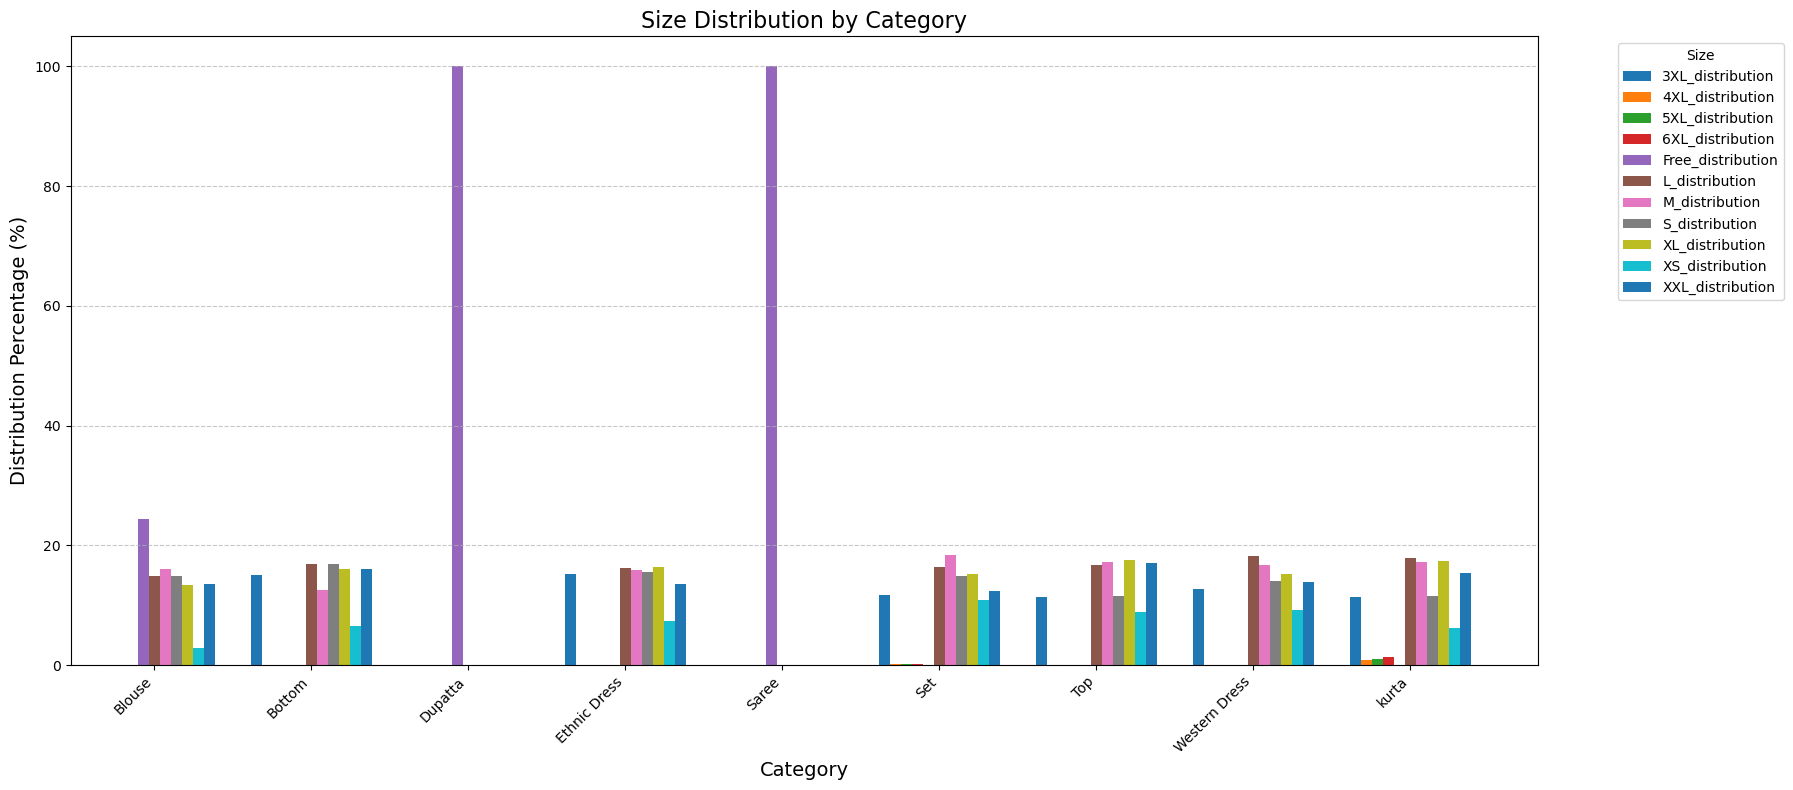

In [99]:
# Get the distribution data
plot_data = category_size_combinations(df2)
plot_data.set_index('category', inplace=True)

# Prepare for plotting
size_columns = plot_data.columns.tolist()
categories = plot_data.index.tolist()
x = np.arange(len(categories))  # label locations

width = 0.07  # width of the bars

# Plot
fig, ax = plt.subplots(figsize=(18, 8))

for i, size in enumerate(size_columns):
    ax.bar(x + i*width, plot_data[size], width, label=size)

# Titles and labels
ax.set_title('Size Distribution by Category', fontsize=16)
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Distribution Percentage (%)', fontsize=14)
ax.set_xticks(x + width * (len(size_columns)-1)/2)
ax.set_xticklabels(categories, rotation=45, ha='right')

ax.legend(title='Size', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()

plt.show()

### Category Aggregate Values

The `function category_sales(df2)` takes a DataFrame `df2` as input and calculates multiple sales statistics grouped by each product category. Specifically, it computes: (1) the sum of sales (`sum_of_sales`), (2) the average sale amount (`avg_sales`), (3) the number of sales (`num_of_sales`), (4) the minimum sale amount (`min_value_of_sale`), (5) the maximum sale amount (`max_value_of_sale`), and (6) the standard deviation of sales (`standard_deviation`) for each category. For each metric, it creates a separate temporary DataFrame, renames the relevant column, and then merges all the metrics together into a single final DataFrame called `sales_category`. The final result is a summary table with each category as the index and the different sales metrics as columns, providing a detailed overview of sales performance across categories.

1. Top Categories by Total Sales
- **Set, Kurta, Western Dress, and Top** dominate total sales by a huge margin compared to other categories.
- Action: Focus marketing, inventory, and promotions on these four categories to maximize revenue growth.

2. Low-Performing Categories
- **Dupatta** has extremely low total sales (`₹915`) and very few orders (`3` orders).
- Action: Evaluate whether to continue offering this product. Consider retiring it or only keeping it in very niche collections.

3. Average Sale Value Analysis
- **Saree and Set** have the **highest average sale** value (`₹755` and `₹779` respectively).
- Action: These products are higher-ticket items — emphasize them in premium campaigns to increase the average order value.

4. Sales Volume
- **Set** (`50,284 sales`) and **Kurta** (`49,877 sales`) have extremely high sales volumes.
- Action: Ensure robust inventory management and faster restocking cycles for these categories to prevent stockouts.

5. Pricing Consistency
- **Dupatta** shows zero standard deviation (0.0), meaning all 3 sales happened at the exact same price (`₹305`).
- Action: Pricing is not dynamic. Consider offering variable pricing (discounts, bundles) to test demand elasticity.

6. High Variability Categories
- **Set and Ethnic Dress** have **high standard deviations** (`₹349` and `₹306` respectively), meaning prices vary a lot within the category.
- Action: Customers may perceive inconsistency. Consider segmenting products more clearly by quality/price or using tiered marketing to reduce confusion.

7. Opportunities for Upselling
- Categories like **Blouse, Bottom, and Top** have moderate average sale values (`₹342–₹495`) but decent volume.
- Action: Introduce upselling bundles (e.g., buy a Top + Bottom together) to lift the average cart value.

In [100]:
def category_sales(df2):
    # Sum of sales calculation
    sum_sales = df2.groupby('category').amount.sum().reset_index()
    sum_sales.rename(columns={'amount': 'sum_of_sales'}, inplace=True)

    # Average of Sales calculation
    avg_sales = df2.groupby('category').amount.mean().reset_index()
    avg_sales.rename(columns={'amount': 'avg_sales'}, inplace=True)

    # Number of sales in category
    num_sales = df2.groupby('category').order_id.count().reset_index()
    num_sales.rename(columns={'order_id': 'num_of_sales'}, inplace=True)

    # Min value of sale calculation
    min_sale = df2.groupby('category').amount.min().reset_index()
    min_sale.rename(columns={'amount': 'min_value_of_sale'}, inplace=True)

    # Max value of sale calculation
    max_sale = df2.groupby('category').amount.max().reset_index()
    max_sale.rename(columns={'amount': 'max_value_of_sale'}, inplace=True)

    # Standard deviation between sales within the categories
    std_deviation = df2.groupby('category').amount.std().reset_index()
    std_deviation.rename(columns={'amount': 'standard_deviation'}, inplace=True)

    # Merge DataFrames
    sales_category = sum_sales.merge(avg_sales, on='category').merge(num_sales, on='category').merge(min_sale, on='category').merge(max_sale, on='category').merge(std_deviation, on='category')

    # Set index to category
    sales_category.set_index('category', inplace=True)

    return sales_category

category_sales(df2)

,sum_of_sales,avg_sales,num_of_sales,min_value_of_sale,max_value_of_sale,standard_deviation
category,,,,,,
Blouse,458408.18,495.041231,926,0.0,1266.66,204.275046
Bottom,150667.98,342.427227,440,0.0,1028.58,136.566603
Dupatta,915.00,305.000000,3,305.0,305.00,0.000000
Ethnic Dress,791217.66,682.672701,1159,0.0,1449.00,306.683900
Saree,123933.76,755.693659,164,0.0,2058.00,268.821669
Set,39204124.03,779.654046,50284,0.0,5584.00,349.856276
Top,5347792.30,503.463783,10622,0.0,1797.00,180.721287
Western Dress,11216072.69,723.617593,15500,0.0,2860.00,234.597095
kurta,21299546.70,427.041456,49877,0.0,2796.00,181.908556


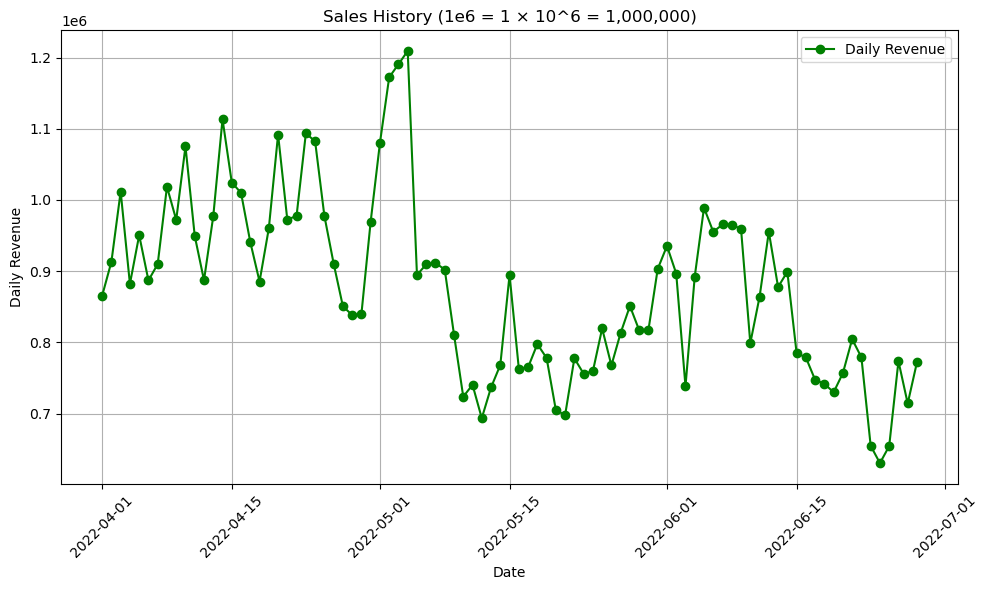

In [101]:
# Find the minimum and maximum dates
min_date = df2['date'].min()
max_date = df2['date'].max()

# Filter the DataFrame to remove rows with these dates
df_filtered = df2[(df2['date'] != min_date) & (df2['date'] != max_date)]

# Grouping by 'date' and summing the 'amount' for each date
plot = df_filtered.groupby('date')['amount'].sum().reset_index()

# Setting 'date' as the index
plot.set_index('date', inplace=True)

# Plotting the data using Matplotlib
plt.figure(figsize=(10,6))
plt.plot(plot.index, plot['amount'], marker='o', color='g', label='Daily Revenue')  # Line plot
plt.title('Sales History (1e6 = 1 × 10^6 = 1,000,000)')  # Adding title
plt.xlabel('Date')  # Adding x-axis label
plt.ylabel('Daily Revenue')  # Adding y-axis label
plt.xticks(rotation=45)
plt.grid(True)  # Adding gridlines
plt.legend()  # Show legend
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

### Top and Bottom Percentile of Categories

The `sales_percentiles` function calculates the 25th and 75th percentiles of sales for each product category in the `df2` DataFrame. It first uses the `np.percentile()` function from the NumPy library to calculate the 25th percentile (lower quartile) and 75th percentile (upper quartile) of the sales amount for each category. The results are stored in separate DataFrames: one for the lower 25th percentile and one for the higher 75th percentile. These DataFrames are then renamed to indicate the corresponding percentiles (`lower_25th_percentile` and `higher_75th_percentile`). The function returns both DataFrames, allowing for an analysis of the sales distribution within each category. This can help identify trends in sales performance, such as whether certain categories are consistently performing above or below specific thresholds.

The distribution of sales across categories indicates variability, with some categories and products performing better than others. Actionable steps include focusing on high-performing items to boost their visibility, addressing underperforming products through potential improvements in marketing or product offerings, and exploring why certain products (like Dupattas) show consistent sales with little variation. By targeting specific actions based on these insights, businesses can maximize their potential for growth in each category.

In [102]:
def sales_percentiles(df2):
    
    # Numpy as np to calculate 25 percentile of sales (lower)
    bottom_percentile = df2.groupby('category').amount.apply(lambda x: np.percentile(x, 25)).reset_index()
    bottom_percentile.rename(columns={'amount': 'lower_25th_percentile'}, inplace=True)
    # Numpy as np to calculate 75 percentile of sales (higher)
    top_percentile = df2.groupby('category').amount.apply(lambda x: np.percentile(x, 75)).reset_index()
    top_percentile.rename(columns={'amount': 'higher_75th_percentile'}, inplace=True)

    return bottom_percentile, top_percentile

sales_percentiles(df2)

(        category  lower_25th_percentile
 0         Blouse                 383.00
 1         Bottom                 301.00
 2        Dupatta                 305.00
 3   Ethnic Dress                 399.00
 4          Saree                 656.25
 5            Set                 605.00
 6            Top                 432.00
 7  Western Dress                 721.00
 8          kurta                 358.10,
         category  higher_75th_percentile
 0         Blouse                   625.0
 1         Bottom                   377.0
 2        Dupatta                   305.0
 3   Ethnic Dress                   855.0
 4          Saree                   885.0
 5            Set                   999.0
 6            Top                   588.0
 7  Western Dress                   807.0
 8          kurta                   499.0)

### Country Data

The function `country_data(df2)` groups the sales data by city and state, which are combined into a new column `state_and_city`. It then calculates the total sales for each unique state-city combination, sorting them in descending order by the sales amount. The function further filters the results into two DataFrames: one (`top_sales`) containing the top 10 cities with the highest sales, and another (`no_sales`) showing cities with zero sales. It appears to be correct, as it properly aggregates sales data by geographical location, filters out cities with no sales, and provides actionable insights by highlighting the top-performing cities.

1. Top Performing Cities:
- **Bengaluru, Karnataka** leads with a substantial sales amount of ₹6,849,664.99, followed by **Hyderabad, Telangana** at ₹4,941,131.82. This suggests that these cities are the most lucrative markets for your products.
- **Mumbai, Maharashtra** and **New Delhi, Delhi** are also high-performing cities, with sales nearing ₹3.7 million and ₹3.6 million, respectively.
- Cities in southern and western India, like Chennai, Tamil Nadu and Pune, Maharashtra, also show strong sales, highlighting the importance of these regions for sales growth.

2. Potential for Growth in Specific Regions:
- **Gurugram, Haryana and Lucknow, Uttar Pradesh** have noticeable sales of ₹1.2 million and ₹933,926.34, suggesting these markets still have room for further development.
- Although these regions show significant sales, targeting smaller or less mature cities within these states might lead to increased growth opportunities.

3. **Cities with Zero Sales**:
- A significant portion of cities, such as Nivi, Uttar Pradesh, Jila Bijnor, Uttar Pradesh, and Barkisaraiya, Jharkhand, have reported zero sales, suggesting these regions may either have no demand for the product or have been under-served.
- **Marketing and Distribution Strategies**: Focus on improving marketing and distribution channels in these regions, especially if there is a strategic interest in tapping into emerging markets. The absence of sales could indicate gaps in accessibility or brand awareness.
- Additionally, investigating customer preferences and adjusting product offerings may be helpful in regions where there is zero sales activity.

4. Geographical Gaps to Address:
- The zero-sales entries might indicate that some rural or less urbanized areas are not engaging with your product. It could be beneficial to explore why these areas show no sales and whether there are logistical or cultural barriers.
- Cities such as Mukhed, Maharashtra and Silchar, Assam may require localized approaches, such as adjusting product offerings or improving regional marketing efforts.

5. Actionable Focus Areas:
- Prioritize high-sales regions like Bengaluru and Hyderabad for targeted promotions or new product launches, as they already demonstrate significant demand.
- For zero-sales regions, conduct market research to understand the reasons for low engagement and consider targeted outreach strategies, such as localized promotions, partnerships, or customized product offerings.

In [103]:
# Calculating data for the countries. Grouping data by ship_state and ship_city since all the ship_country is the same
# To inspect ship_country you can write `df2.ship_country.value_counts()`

def country_data(df2):
    df2['state_and_city'] = df2['ship_state'] + ', ' + df2['ship_city']
    sales_per_country = (
        df2.groupby(['state_and_city'])['amount']
        .sum()
        .reset_index()
        .sort_values(by='amount', ascending=False)
    )
    # Filter out the values where there were 0 sales 
    top_sales = sales_per_country[sales_per_country['amount'] != 0]
    no_sales = sales_per_country[sales_per_country['amount'] == 0]

    return top_sales.head(10), no_sales

country_data(df2)

(              state_and_city      amount
 2537    KARNATAKA, BENGALURU  6849664.99
 7402    TELANGANA, HYDERABAD  4941131.82
 4889     MAHARASHTRA, MUMBAI  3704461.80
 1315        DELHI, NEW DELHI  3608136.83
 6563     TAMIL NADU, CHENNAI  3098745.74
 5127       MAHARASHTRA, PUNE  2338518.18
 8846    WEST BENGAL, KOLKATA  1414978.87
 1991       HARYANA, GURUGRAM  1221618.74
 5326      MAHARASHTRA, THANE  1004355.29
 8108  UTTAR PRADESH, LUCKNOW   933926.34,
                      state_and_city  amount
 8205            UTTAR PRADESH, NIVI     0.0
 8031     UTTAR PRADESH, Jila bijnor     0.0
 2350       JHARKHAND, BARKI SARAIYA     0.0
 6925  TAMIL NADU, OTHAKADAI Madurai     0.0
 3518               KERALA, Koliyoor     0.0
 ...                             ...     ...
 4968            MAHARASHTRA, Mukhed     0.0
 6739          TAMIL NADU, KOTTAIYUR     0.0
 314        ANDHRA PRADESH, MUSUNURU     0.0
 806                   ASSAM, Rangia     0.0
 819          ASSAM, Silchar, Cachar     0

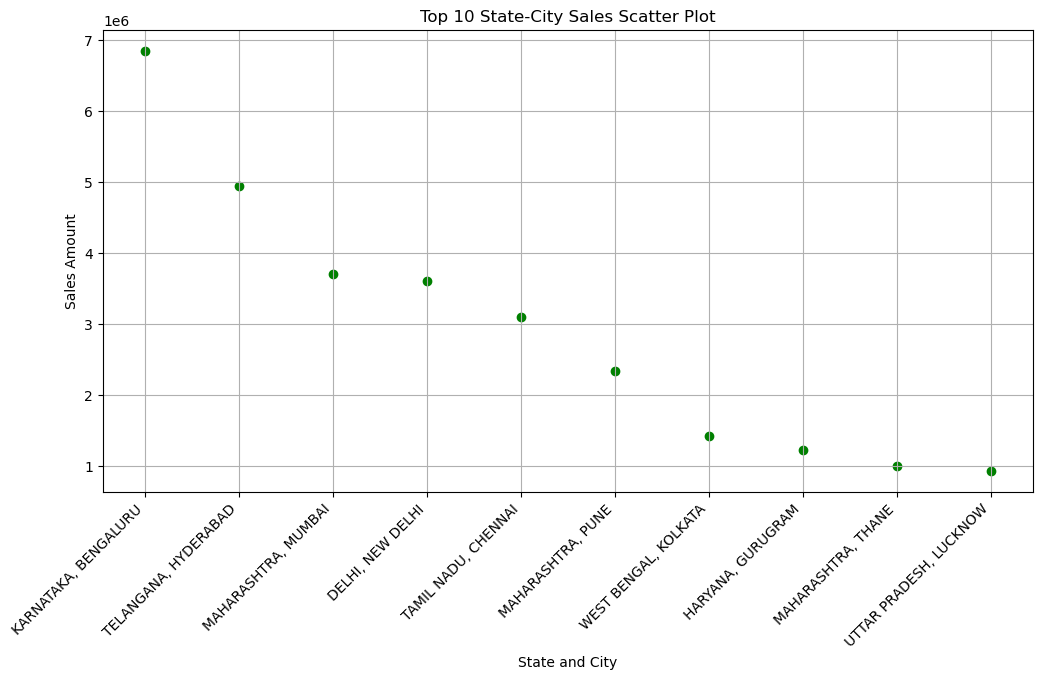

,state_and_city,amount
8205,"UTTAR PRADESH, NIVI",0.0
8031,"UTTAR PRADESH, Jila bijnor",0.0
2350,"JHARKHAND, BARKI SARAIYA",0.0
6925,"TAMIL NADU, OTHAKADAI Madurai",0.0
3518,"KERALA, Koliyoor",0.0
...,...,...
4968,"MAHARASHTRA, Mukhed",0.0
6739,"TAMIL NADU, KOTTAIYUR",0.0
314,"ANDHRA PRADESH, MUSUNURU",0.0
806,"ASSAM, Rangia",0.0


In [104]:
# Call the country_data function to get the top sales and no sales data
top_sales, no_sales = country_data(df2)

# Plotting the top 10 sales regions
# Create scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(top_sales['state_and_city'], top_sales['amount'], color='green')

# Add title and labels
plt.title('Top 10 State-City Sales Scatter Plot')
plt.xlabel('State and City')
plt.ylabel('Sales Amount')
plt.grid(True) # Show gridlines
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotting the regions with zero sales
no_sales

### Top vs. Bottom 10 City Sales

The `city_sales(df2)` function analyzes sales performance by city. It first filters the dataset to exclude any rows where the sales amount is zero, ensuring only meaningful transactions are considered. Then, it groups the data by `ship_city` and calculates the total sales (`amount`) for each city. After that, it sorts the cities in descending order based on total sales to identify the top-performing cities. It also sorts the cities in ascending order to find those with the lowest sales performance. Finally, the function returns two DataFrames: one showing the top 10 cities with the highest sales revenue and another showing the bottom 10 cities with the lowest sales revenue. Overall, this function provides a clear view of which cities are driving the most and least revenue.

1. Focus marketing efforts on top cities:
- The cities in the top 10 sales list are clearly your strongest markets. Consider investing more in localized advertising, promotional events, or partnerships in these areas to further boost revenue.

2. Analyze why bottom cities are underperforming:
- The cities in the bottom 10 might have low sales due to lack of brand awareness, logistical challenges, or lower market demand. It would be useful to investigate if improving delivery times, offering location-specific discounts, or running targeted marketing campaigns could help lift performance.

3. Optimize inventory management:
- Knowing where the highest sales come from allows you to optimize inventory distribution, ensuring that high-demand cities are better stocked to meet customer needs quickly.

4. Potential to cut losses:
- If after investigation the bottom 10 cities show consistently low performance without significant potential for growth, it may be more cost-effective to scale back marketing or operations there and redirect resources to stronger markets.

5. Test new products in top cities:
- Since top cities have a strong customer base, they can be good locations to launch and test new products or collections before rolling them out to other regions.



In [105]:
def city_sales(df2):
    # Drop NA values from original data
    df2 = df2[df2.amount != 0]

    # Filter for top and bottom 10 sum of sales to determine which cities had the highest and lowest revenue
    top_10 = df2.groupby('ship_city').amount.sum().reset_index().sort_values(by='amount', ascending=False)
    bottom_10 = top_10.sort_values(by='amount', ascending=True)

    return top_10.head(10), bottom_10.head(10)

top_10_city_sales, bottom_10_city_sales = city_sales(df2)
top_10_city_sales, bottom_10_city_sales

(      ship_city      amount
 749   BENGALURU  6849664.99
 2811  HYDERABAD  4946032.82
 4648     MUMBAI  3704461.80
 5225  NEW DELHI  3613874.78
 1416    CHENNAI  3098745.74
 5978       PUNE  2338518.18
 3599    KOLKATA  1414978.87
 2530   GURUGRAM  1221618.74
 7367      THANE  1004355.29
 4264    LUCKNOW   933926.34,
                ship_city  amount
 3003               Itagi  236.19
 3556          KILAPAVOOR  241.00
 5048          NADUVANNUR  248.00
 1312        Byatryanpura  259.00
 426        Andul, Howrah  259.00
 4289               Lanka  259.00
 8660       trichirapalli  266.67
 5221  NERUL, NAVI MUMBAI  267.00
 4834  Manipuzha Kottayam  267.00
 8055             Varanai  273.00)

### Top vs Bottom 10 State Sales

The `state_sales(df2)` function analyzes sales performance by state. It first filters the dataset to exclude any rows where the sales amount is zero, ensuring only meaningful transactions are considered. Then, it groups the data by `ship_state` and calculates the total sales (`amount`) for each state. After that, it sorts the states in descending order based on total sales to identify the top-performing states. It also sorts the states in ascending order to find those with the lowest sales performance. Finally, the function returns two DataFrames: one showing the top 10 states with the highest sales revenue and another showing the bottom 10 states with the lowest sales revenue. Overall, this function provides a clear view of which states are driving the most and least revenue.

In [106]:
def state_sales(df2):
    # Drop NA values from original data
    df2 = df2[df2.amount != 0]

    # Filter for top and bottom 10 sum of sales to determine which cities had the highest and lowest revenue
    top_10 = df2.groupby('ship_state').amount.sum().reset_index().sort_values(by='amount', ascending=False)
    bottom_10 = top_10.sort_values(by='amount', ascending=True)

    return top_10.head(10), bottom_10.head(10)

top_10_state_sales, bottom_10_state_sales = state_sales(df2)
top_10_state_sales, bottom_10_state_sales

(        ship_state       amount
 27     MAHARASHTRA  13335534.14
 22       KARNATAKA  10481114.37
 57       TELANGANA   6916615.65
 59   UTTAR PRADESH   6816642.08
 56      TAMIL NADU   6515650.11
 13           DELHI   4235215.97
 23          KERALA   3830227.58
 61     WEST BENGAL   3507880.44
 1   ANDHRA PRADESH   3219831.72
 18         HARYANA   2882092.99,
                 ship_state  amount
 42                      PB   399.0
 53                Rajsthan   443.0
 2                       AR   493.0
 68                rajsthan   521.0
 45             Pondicherry   529.0
 46              Puducherry   568.0
 48  Punjab/Mohali/Zirakpur   568.0
 65                  orissa   597.0
 6        Arunachal pradesh   602.0
 36                Nagaland   664.0)

### Order Statuses

Analyzes how customer order statuses are distributed across all records in the dataset. 
First, it calculates the percentage distribution of each unique status (like Delivered, Cancelled, Returned, etc.) by using value_counts(normalize=True) * 100, turning the counts into percentages. Then, it tries to rename the distribution series to 'distribution_of_order_status' (although the renaming line is missing an assignment, so technically it doesn’t take effect — I can explain how to fix it if you want).

Next, it merges the original df2 dataset with this calculated distribution, matching based on the status values.
After the merge, every row in df2 now has an extra column showing the percentage of that order's status relative to the whole dataset.

Finally, it groups the data again by status, keeps only the first occurrence of the distribution percentage for each status (since every row for a given status will have the same percentage), sorts these percentages in descending order, and returns a clean DataFrame showing each status and its share of the total orders.

The majority of orders (**over 60%**) are marked as "**Shipped**," and an additional **22.31%** are classified as "**Shipped - Delivered to Buyer**," indicating that most orders are successfully moving through the shipping pipeline. However, a significant **14.21%** of orders are marked "**Cancelled**," which is a red flag suggesting potential issues with order fulfillment, customer satisfaction, or payment processing that need further investigation.
Smaller but still noteworthy issues include "Shipped - Returned to Seller" (1.51%) and "Shipped - Picked Up" (0.75%), pointing to occasional problems in delivery attempts or customer refusals.
Very small percentages (less than 1%) of statuses like "Pending," "Waiting for Pick Up," "Returning to Seller," "Lost in Transit," and "Damaged" still exist — while individually minor, cumulatively they indicate areas to strengthen logistics operations, communication, and carrier reliability.

- Investigate the 14% Cancelled Orders: Find patterns (e.g., specific products, locations, payment failures) and implement interventions like better stock visibility, payment reminders, or fraud checks.
- Analyze Returns (1.5%): Understand if returns are caused by product quality, miscommunication, or delivery failures, and address accordingly.
- Minimize "Lost" and "Damaged" Shipments: Although very low, these losses hurt brand trust. Partner closely with logistics providers to ensure better handling and tracking.
- Focus on "Pending" Orders: Even small delays can harm customer satisfaction. Ensure orders don’t get stuck in pending statuses with automated alerts.
- Celebrate Success in Shipping: Over 80% of orders move into "Shipped" or "Delivered" stages — this is a strength you can showcase to customers to build trust and loyalty.



In [107]:
# Calculate the percentage distribution of each unique status
status_distribution = df2['status'].value_counts(normalize=True) * 100
status_distribution = status_distribution.rename('distribution_of_order_status')
order_status = pd.merge(
    df2,
    status_distribution,
    how='left',
    left_on='status',
    right_index=True
)

status = order_status.groupby('status')['distribution_of_order_status'].first().reset_index().sort_values(by='distribution_of_order_status', ascending=False)

status

,status,distribution_of_order_status
3,Shipped,60.324869
5,Shipped - Delivered to Buyer,22.305873
0,Cancelled,14.213607
10,Shipped - Returned to Seller,1.514247
8,Shipped - Picked Up,0.754410
1,Pending,0.510176
2,Pending - Waiting for Pick Up,0.217872
11,Shipped - Returning to Seller,0.112425
7,Shipped - Out for Delivery,0.027137
9,Shipped - Rejected by Buyer,0.008529


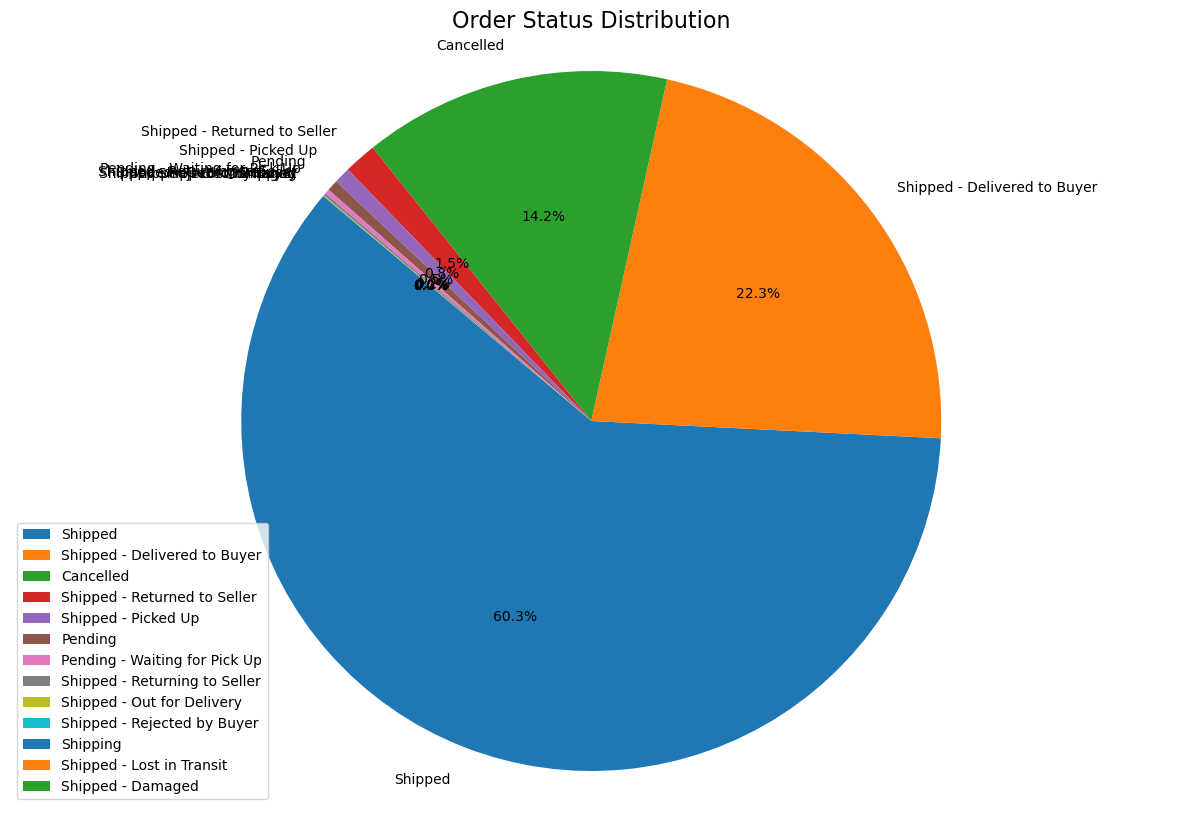

In [108]:
# Pie chart
plt.figure(figsize=(15, 10))
plt.pie(
    status['distribution_of_order_status'],
    labels=status['status'],
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 10}
)

plt.title('Order Status Distribution', fontsize=16)
plt.axis('equal')
plt.legend()
plt.show()

# B2B vs B2C Sales Performance

Filter `b2b` and `b2c` for inspection of individual performance.

In [109]:
b2b = (df1[df1['b2b'] == True])
b2c = (df1[df1['b2b'] != True])

In [110]:
# Sum the amount per B2B (True/False) category and pivot the data for B2C and B2B
sales_by_b2b = df2.groupby('b2b')['amount'].sum().reset_index()

# Pivoting and renaming columns for clarity
sales_by_b2b_pivoted = sales_by_b2b.pivot_table(index=None, columns='b2b', values='amount', aggfunc='sum').rename(columns={False: 'B2C', True: 'B2B'})

# Display B2C and B2B sales
sales_by_b2b_pivoted

b2b,B2C,B2B
amount,78001457.51,591220.79


In [111]:
b2b.head()

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category,size,asin,courier_status,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Not Provided
241,241,407-5766340-7411567,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3440,JNE3440-KR-N-XS,kurta,XS,B09HMY3YLT,Shipped,1,INR,399.0,AHMEDABAD,Gujarat,380022,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Not Provided
657,657,405-9201316-2870743,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0117,J0117-TP-XXL,Top,XXL,B08N4XHHCQ,Shipped,1,INR,518.0,MIHAN,MAHARASHTRA,441110,IN,Amazon PLCC Free-Financing Universal Merchant ...,True,Easy Ship
859,859,407-6114533-2816312,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3722,JNE3722-KR-L,kurta,L,B09BQBB47Y,Shipped,1,INR,280.0,MADIKERI,KARNATAKA,571201,IN,Amazon PLCC Free-Financing Universal Merchant ...,True,Easy Ship
860,860,407-6002733-2903540,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3480,JNE3480-KR-M,kurta,M,B099RJY1RY,Shipped,1,INR,249.0,MADIKERI,KARNATAKA,571201,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Not Provided


The function `b2b_category_sales(b2b)` takes a DataFrame `b2b` as input and calculates multiple sales statistics grouped by each product category. Specifically, it computes: (1) the sum of sales (`sum_of_sales`), (2) the average sale amount (`avg_sales`), (3) the number of sales (`num_of_sales`), (4) the minimum sale amount (`min_value_of_sale`), (5) the maximum sale amount (`max_value_of_sale`), and (6) the standard deviation of sales (`standard_deviation`) for each category. For each metric, it creates a separate temporary DataFrame, renames the relevant column, and then merges all the metrics together into a single final DataFrame called `sales_category`. The final result is a summary table with each category as the index and the different sales metrics as columns, providing a detailed overview of sales performance across categories.

1. **Strong Performing Categories (High Revenue Potential):**
Set stands out as the highest revenue-generating category, with a total sales value of 297,241.10. This category is the highest in both total sales and average sales value (874.24 per transaction), indicating a strong market demand. B2B partners could capitalize on this by prioritizing bulk orders or long-term partnerships, potentially negotiating volume discounts or exclusive offers.

2. **High-Value Sales Per Transaction (Premium Products):**
Saree has a notable average sales per transaction of 825.50, despite having a smaller number of sales. This indicates a premium product category with significant potential for high-margin sales. B2B clients specializing in high-end retail or boutique stores may find this category appealing. Offering tailored B2B deals or limited-edition assortments could strengthen business relationships and drive larger orders.

3. **High Sales Volume and Consistent Demand**:
Set and Ethnic Dress exhibit a healthy number of sales (340 and 15 transactions, respectively), coupled with strong average sales values. These categories represent a stable demand for retailers. B2B partners should consider offering customizable options or exclusive packages for high-volume resellers, as well as exploring cross-category promotions to enhance order value.

4. **Price Variability Insights**:
Bottom has a significant standard deviation (137.62) in its price points, which suggests varied products within the category. For B2B suppliers, this represents an opportunity to tailor offerings to different retail segments, allowing for flexibility in bulk pricing. By segmenting the product range, suppliers can create packages suited for varying customer needs, thus appealing to both budget-conscious and premium-focused buyers.

5. **Untapped Growth Categories**:
Blouse, while having fewer sales (8), shows strong average transaction values (392.88), indicating a market for mid-range products with strong margins. B2B partners could explore joint marketing campaigns to increase awareness and adoption, particularly in markets where this product type has emerging demand.

6. **Categories with Discounted or Return Potential**:
Multiple categories such as Set, Top, and Kurta show a minimum sale value of 0, which suggests potential for returns or deep discounts. B2B suppliers should investigate the reasons for these occurrences and refine their pricing strategies to avoid margin erosion. Additionally, offering “return and replace” policies may help mitigate the impact of returns and foster stronger long-term relationships.

7. **Product Variability and Customization for B2B Clients**:
Set category’s high standard deviation (426.24) could indicate diverse pricing across product types. B2B partners could benefit from offering customized solutions or flexible bulk pricing based on the specific needs of their end customers. This flexibility could help cater to various market segments, from discount chains to premium boutiques.

8. **Opportunities for Premium Marketing**:
Categories like Ethnic Dress and Western Dress have high average sales per transaction and can be marketed as premium or exclusive product lines. B2B clients in luxury retail or boutique stores could benefit from exclusive deals or collaborative marketing efforts. By offering specialized bundles or seasonal promotions, B2B vendors can increase volume sales while enhancing brand prestige.

In [112]:
def b2b_category_sales(b2b):
    # Sum of sales calculation
    sum_sales = b2b.groupby('category').amount.sum().reset_index()
    sum_sales.rename(columns={'amount': 'sum_of_sales'}, inplace=True)

    # Average of Sales calculation
    avg_sales = b2b.groupby('category').amount.mean().reset_index()
    avg_sales.rename(columns={'amount': 'avg_sales'}, inplace=True)

    # Number of sales in category
    num_sales = b2b.groupby('category').order_id.count().reset_index()
    num_sales.rename(columns={'order_id': 'num_of_sales'}, inplace=True)

    # Min value of sale calculation
    min_sale = b2b.groupby('category').amount.min().reset_index()
    min_sale.rename(columns={'amount': 'min_value_of_sale'}, inplace=True)

    # Max value of sale calculation
    max_sale = b2b.groupby('category').amount.max().reset_index()
    max_sale.rename(columns={'amount': 'max_value_of_sale'}, inplace=True)

    # Standard deviation between sales within the categories
    std_deviation = b2b.groupby('category').amount.std().reset_index()
    std_deviation.rename(columns={'amount': 'standard_deviation'}, inplace=True)

    # Merge DataFrames
    sales_category = sum_sales.merge(avg_sales, on='category').merge(num_sales, on='category').merge(min_sale, on='category').merge(max_sale, on='category').merge(std_deviation, on='category')

    # Set index to category
    sales_category.set_index('category', inplace=True)

    return sales_category

b2b_category_sales(b2b)

,sum_of_sales,avg_sales,num_of_sales,min_value_of_sale,max_value_of_sale,standard_deviation
category,,,,,,
Blouse,3143.00,392.875000,8,344.0,460.0,33.723402
Bottom,1595.67,398.917500,4,273.0,518.0,137.617830
Ethnic Dress,12682.19,845.479333,15,721.0,1125.0,95.328668
Saree,1651.00,825.500000,2,819.0,832.0,9.192388
Set,297241.10,874.238529,340,0.0,5495.0,426.242408
Top,32592.00,534.295082,61,0.0,870.0,148.428248
Western Dress,83303.72,737.201062,113,0.0,1542.0,215.184016
kurta,159012.11,484.793018,328,0.0,1672.0,185.215832


In [113]:
b2c.head()

,index,order_id,date,status,fulfilment,sales_channel_,ship_service_level,style,sku,category,size,asin,courier_status,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Not Provided,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,Not Provided,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Not Provided,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,Not Provided,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,Not Provided,False,Not Provided
5,5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,B08YN7XDSG,Shipped,1,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Not Provided


The function `b2c_category_sales(b2c)` takes a DataFrame `b2c` as input and calculates multiple sales statistics grouped by each product category. Specifically, it computes: (1) the sum of sales (`sum_of_sales`), (2) the average sale amount (`avg_sales`), (3) the number of sales (`num_of_sales`), (4) the minimum sale amount (`min_value_of_sale`), (5) the maximum sale amount (`max_value_of_sale`), and (6) the standard deviation of sales (`standard_deviation`) for each category. For each metric, it creates a separate temporary DataFrame, renames the relevant column, and then merges all the metrics together into a single final DataFrame called `sales_category`. The final result is a summary table with each category as the index and the different sales metrics as columns, providing a detailed overview of sales performance across categories.

1. **Top Revenue Generators (High Sales Volume):**
Set is the clear leader in sales with a massive total of 38,906,882.93, driven by 49,944 transactions. This category has a robust average sales value of 779.01 per transaction, making it a high-revenue category. B2C customers should be targeted with promotions that encourage repeat purchases, loyalty programs, and bundling options for cross-selling within this category.

2. **High Average Sales Per Transaction (Premium Options):**
Saree and Ethnic Dress exhibit higher average sales per transaction (754.83 and 680.54, respectively), with total sales amounts of 122,282.76 and 778,535.47. These categories cater to consumers willing to spend more per item, signaling an opportunity to emphasize exclusivity and premium product features. Targeting affluent B2C customers with marketing messages that highlight quality, elegance, or cultural significance can further boost demand.

3. **Large Volume of Sales with High Frequency:**
Top and Kurta categories also show impressive sales figures with 10,561 and 49,549 transactions respectively. Although these categories have lower average sales (503.29 and 426.66), the volume reflects consistent customer interest. For B2C sales strategies, focusing on repeat customers, offering discounts for multiple purchases, or highlighting trendy or seasonal styles could drive even greater sales in these high-volume categories.

4. **Product Range and Price Flexibility:**
Categories such as Bottom and Blouse show a wide range in price (from 0.0 to 1266.66 for Blouse). For B2C customers, this flexibility means both budget-conscious shoppers and premium spenders can be catered to. Offering tailored recommendations or segmented pricing strategies can help capture a broader range of B2C consumers, from first-time buyers to high-value repeat customers.

5. **Premium Products with Strong Price Points:**
Blouse and Saree are both high-value categories with substantial standard deviations (204.92 and 270.37). These variations indicate that there are both entry-level and premium products in these categories. B2C marketers can segment these products into different price tiers and offer targeted promotions such as discounts on entry-level products or special bundles for premium options, effectively catering to different buyer personas.

6. **High Variability in Sales Amounts:**
Kurta has a price variation (standard deviation of 181.83) that suggests varied consumer preferences within the category. For B2C interactions, it may be worthwhile to conduct surveys or leverage data analytics to understand these variations and offer personalized discounts, products, or recommendations that align with different consumer preferences, leading to higher engagement and sales.

7. **Smaller Categories with High Potential:**
Dupatta shows a limited number of sales (3), but its average sale is 305.00, indicating a niche market with potential for growth. To capture this market, B2C businesses should consider targeted campaigns to increase awareness, potentially pairing these items with other categories like Ethnic Dress or Saree to drive sales.

8. **Growth Potential in Emerging Categories:**
Ethnic Dress has a high total sales value and a solid number of transactions. B2C businesses can focus on increasing product variety and offering exclusive online-only deals, as the demand for ethnic wear is rising globally. Marketing strategies should leverage trends in global fashion and seasonal events to increase consumer interest.

In [114]:
def b2c_category_sales(b2c):
    # Sum of sales calculation
    sum_sales = b2c.groupby('category').amount.sum().reset_index()
    sum_sales.rename(columns={'amount': 'sum_of_sales'}, inplace=True)

    # Average of Sales calculation
    avg_sales = b2c.groupby('category').amount.mean().reset_index()
    avg_sales.rename(columns={'amount': 'avg_sales'}, inplace=True)

    # Number of sales in category
    num_sales = b2c.groupby('category').order_id.count().reset_index()
    num_sales.rename(columns={'order_id': 'num_of_sales'}, inplace=True)

    # Min value of sale calculation
    min_sale = b2c.groupby('category').amount.min().reset_index()
    min_sale.rename(columns={'amount': 'min_value_of_sale'}, inplace=True)

    # Max value of sale calculation
    max_sale = b2c.groupby('category').amount.max().reset_index()
    max_sale.rename(columns={'amount': 'max_value_of_sale'}, inplace=True)

    # Standard deviation between sales within the categories
    std_deviation = b2c.groupby('category').amount.std().reset_index()
    std_deviation.rename(columns={'amount': 'standard_deviation'}, inplace=True)

    # Merge DataFrames
    sales_category = sum_sales.merge(avg_sales, on='category').merge(num_sales, on='category').merge(min_sale, on='category').merge(max_sale, on='category').merge(std_deviation, on='category')

    # Set index to category
    sales_category.set_index('category', inplace=True)

    return sales_category

b2c_category_sales(b2c)

,sum_of_sales,avg_sales,num_of_sales,min_value_of_sale,max_value_of_sale,standard_deviation
category,,,,,,
Blouse,455265.18,495.931569,918,0.0,1266.66,204.919007
Bottom,149072.31,341.908968,436,0.0,1028.58,136.607872
Dupatta,915.00,305.000000,3,305.0,305.00,0.000000
Ethnic Dress,778535.47,680.537998,1144,0.0,1449.00,307.937680
Saree,122282.76,754.831852,162,0.0,2058.00,270.371943
Set,38906882.93,779.010150,49944,0.0,5584.00,349.196431
Top,5315200.30,503.285702,10561,0.0,1797.00,180.881583
Western Dress,11132768.97,723.517838,15387,0.0,2860.00,234.737235
kurta,21140534.59,426.659157,49549,0.0,2796.00,181.827260
